In [224]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
df = pd.read_csv("/heart.csv")

In [226]:
df2 = pd.read_csv("/o2Saturation.csv")

In [227]:
df.head(3)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1

# Exploratory Data Analysis
#### Independent Variables
- age : Age of the patient
- sex : Sex of the patient
    - 1: Male
    - 0: Female
- cp : chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- exang: exercise induced angina
    - yes: 1
    - no: 0
- oldpeak: ST depression induced by exercise relative to rest.
- slp: Slope of the peak exercise ST segment
- caa: number of major vessels (0-3)
- thall: Thalassemia


#### Target Variable (dependent variable)
- output: Diagnosis of heart disease
    - 1: True (more chance of heart attack)
    - 0: False (less chance of heart attack)

#### Independent Variables
- age : Age of the patient
- sex : Sex of the patient
    - 1: Male
    - 0: Female
- cp : chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- exang: exercise induced angina
    - yes: 1
    - no: 0
- oldpeak: ST depression induced by exercise relative to rest.
- slp: Slope of the peak exercise ST segment
- caa: number of major vessels (0-3)
- thall: Thalassemia


#### Target Variable (dependent variable)
- output: Diagnosis of heart disease
    - 1: True (more chance of heart attack)
    - 0: False (less chance of heart attack)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [229]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

## Check for Duplicate Values
If duplicate value is present drop it. There exist one duplicate row and drop duplicate row

In [230]:
df.duplicated().sum()

1

In [231]:
duplicate_row = df.duplicated(keep=False)
duplicate_rows = df[duplicate_row]
duplicate_rows

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
163   38    1   2     138   175    0        1       173     0      0.0    2   
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
163    4      2       1  
164    4      2       1

In [232]:
df.drop_duplicates(inplace=True)

In [233]:
df.shape

(302, 14)

## Check for Missing values
Null values is not present in dataset.

In [234]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [235]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [236]:
# find distinct values

for attribute in df.columns:
    distinct_values = len(df[attribute].unique())
    print(f"{attribute}: {distinct_values} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


In [237]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index=["Distinct Values"]).transpose()

Distinct Values
age                    41
sex                     2
cp                      4
trtbps                 49
chol                  152
fbs                     2
restecg                 3
thalachh               91
exng                    2
oldpeak                40
slp                     3
caa                     5
thall                   4
output                  2

## Univariate Analysis
- Histogram

<Figure size 1000x1000 with 0 Axes>

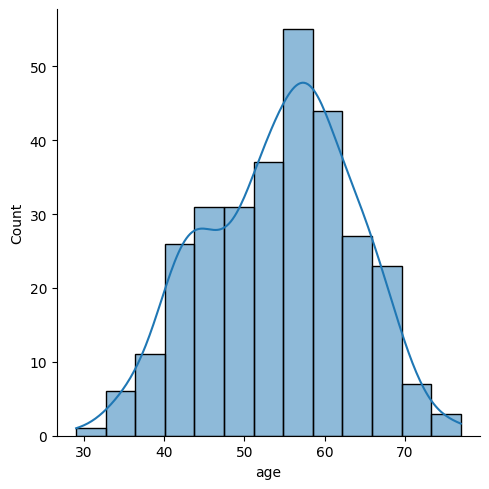

<Figure size 1000x1000 with 0 Axes>

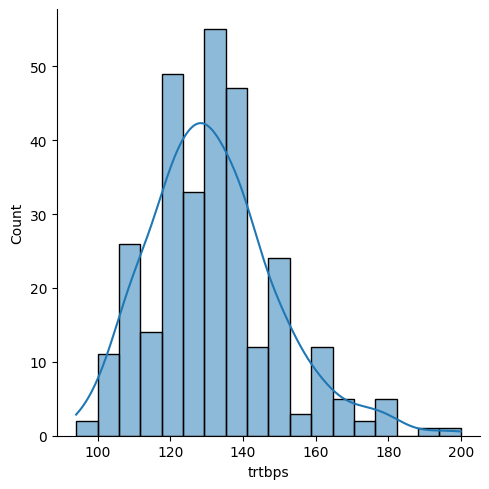

<Figure size 1000x1000 with 0 Axes>

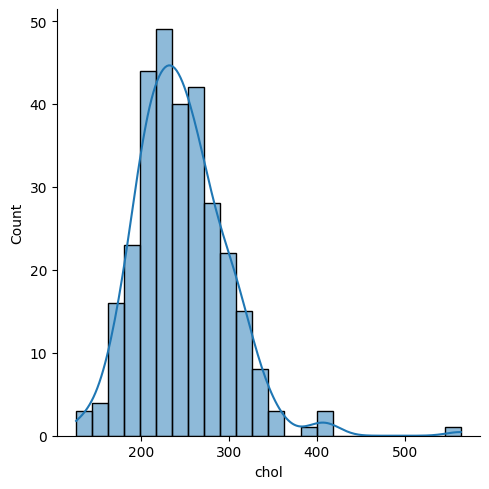

<Figure size 1000x1000 with 0 Axes>

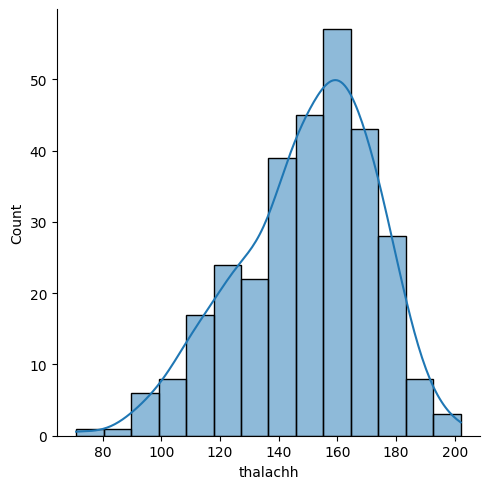

<Figure size 1000x1000 with 0 Axes>

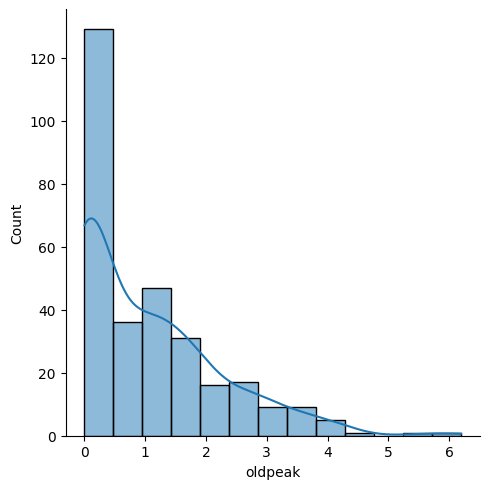

In [238]:
univariate_variables = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

for var in univariate_variables:
    plt.figure(figsize=(10, 10))
    sns.displot(df, x=var, kde=True)

#plt.figure(figsize=(10,10))
#sns.displot(heart.age, color="red", label="Age", kde= True)
#plt.legend()

1    164
0    138
Name: output, dtype: int64


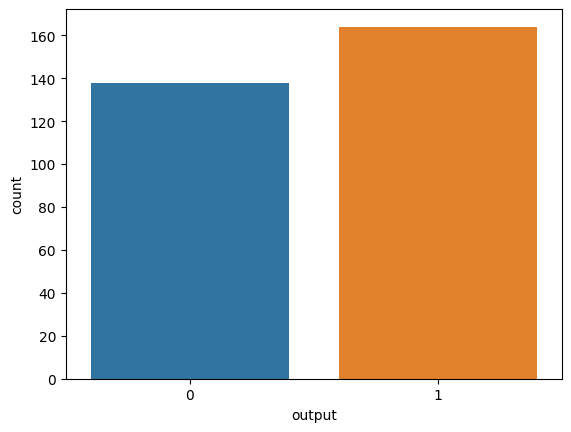

In [239]:
target = df.output.value_counts()
print(target)
sns.countplot(df, x='output')
plt.show()

## Data Frame 2

In [240]:
distinct_values = len(df2['98.6'].unique())
print(f"98.6 attribute have : {distinct_values} distinct values")

98.6 attribute have : 17 distinct values


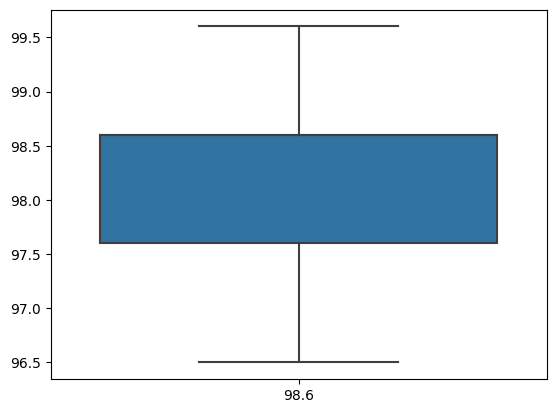

In [241]:
sns.boxplot(df2)
plt.show()

## Bivariate Analysis
- KDE Plot
- Scatter Plot

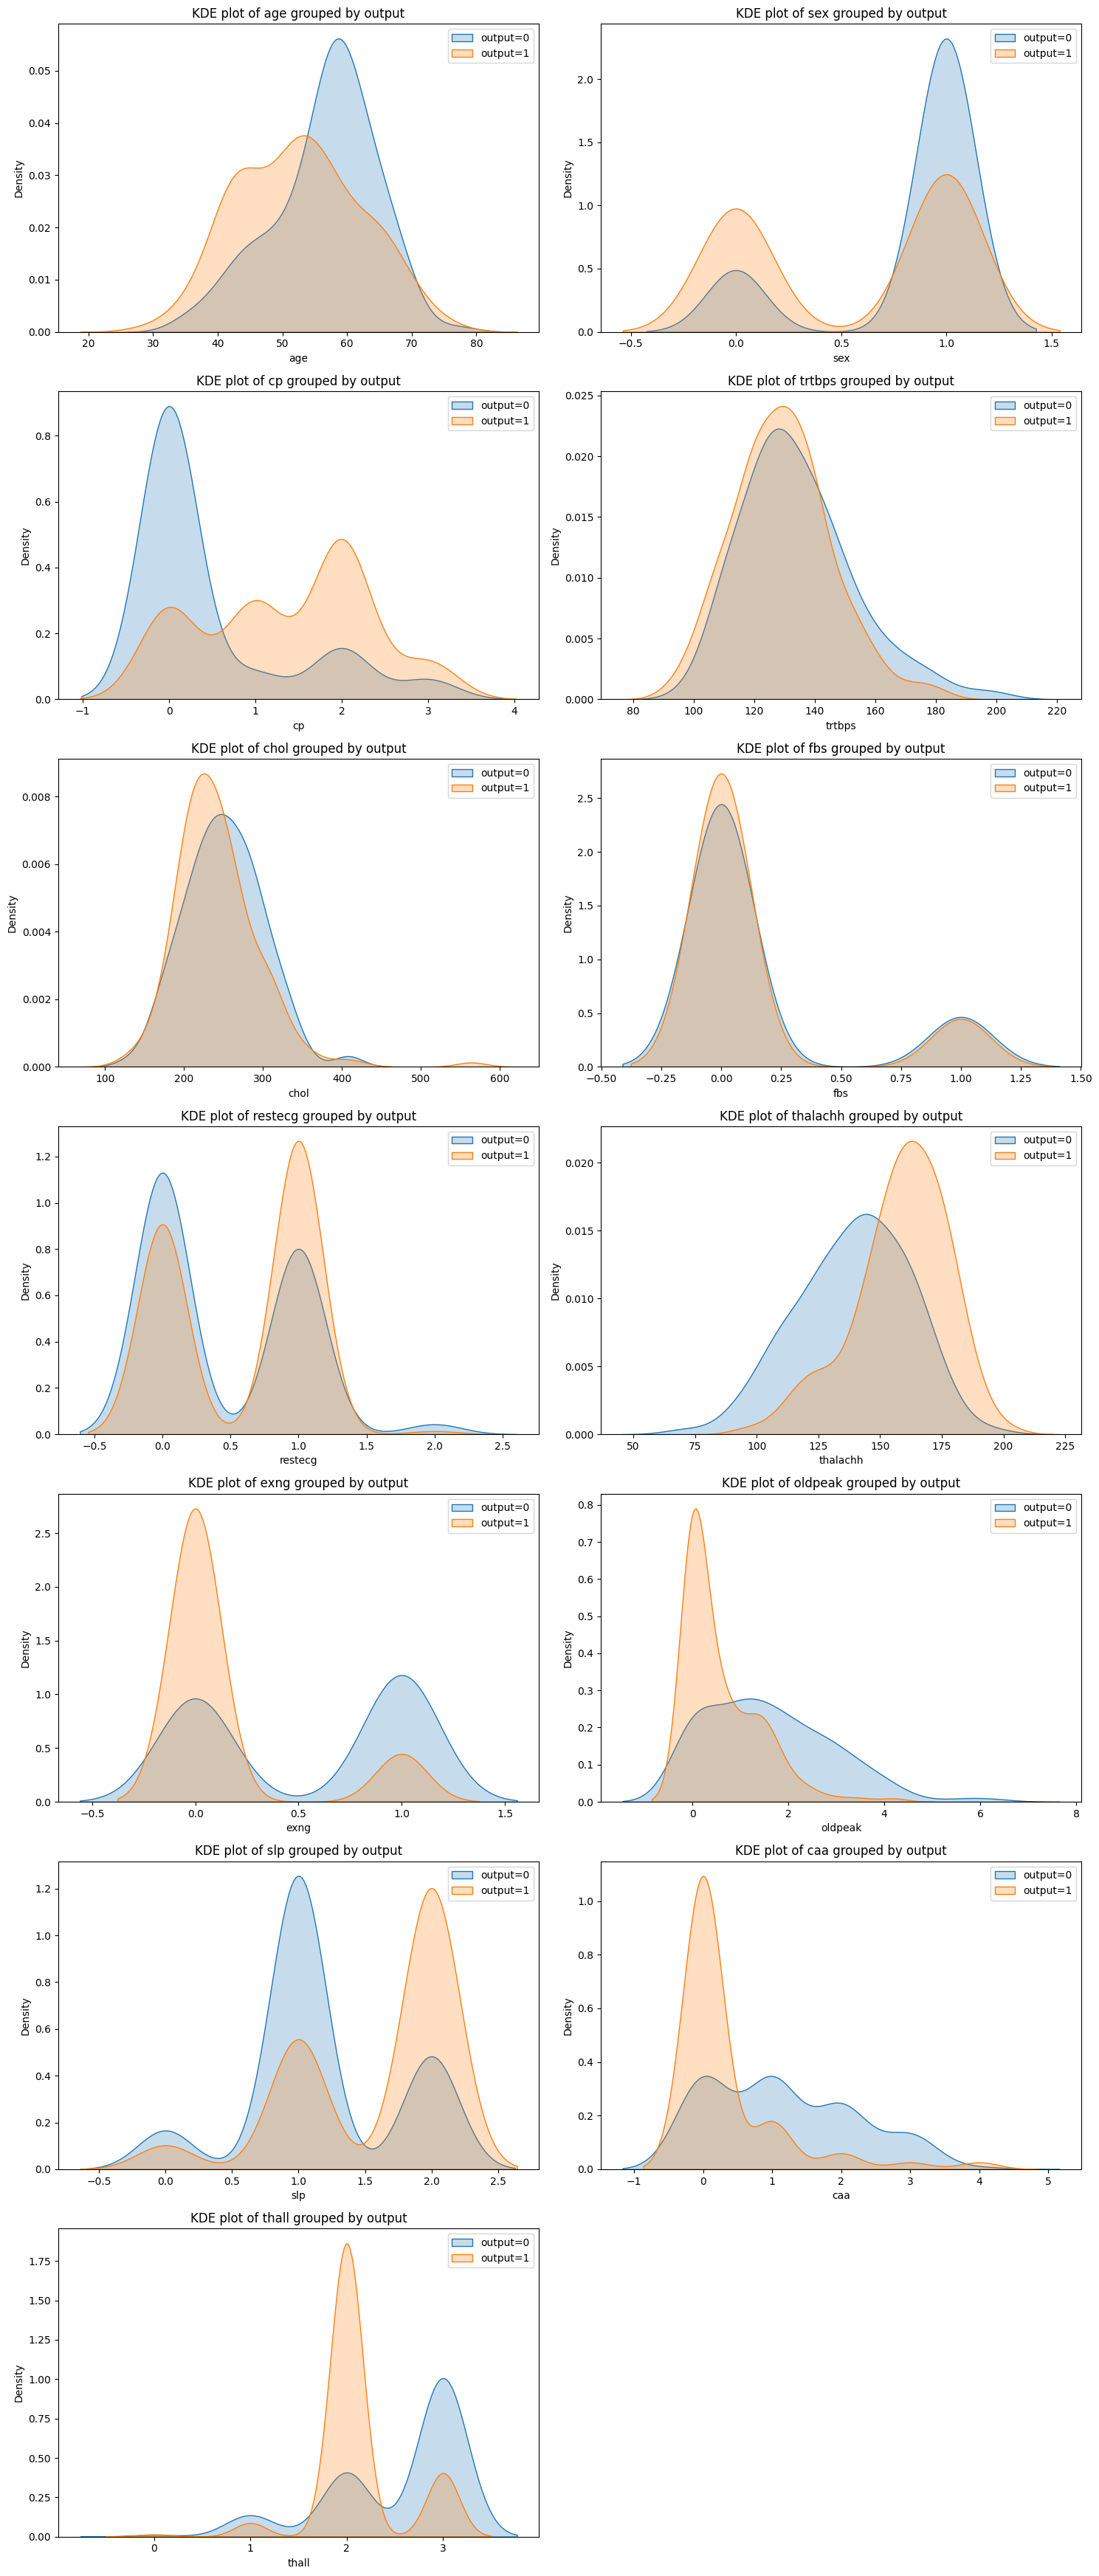

In [242]:
num_columns = len(df.columns) - 1
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(15, 5*num_rows))


for i, column in enumerate(df.columns.drop('output')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['output'] == 0][column], label='output=0', fill=True)
    sns.kdeplot(data=df[df['output'] == 1][column], label='output=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by output')
    plt.legend()

plt.tight_layout()
plt.show()

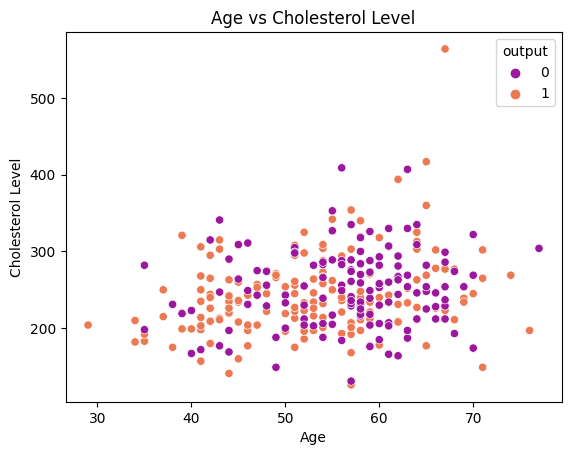

In [243]:
sns.scatterplot(x='age', y='chol', hue='output',data=df, palette='plasma')
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

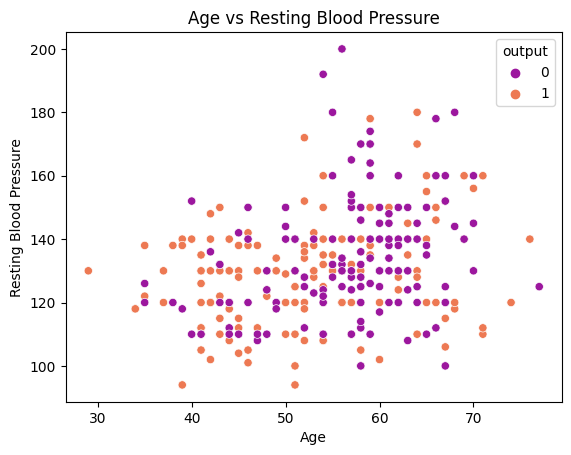

In [244]:
sns.scatterplot(x='age', y='trtbps', hue='output', data=df, palette='plasma')
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

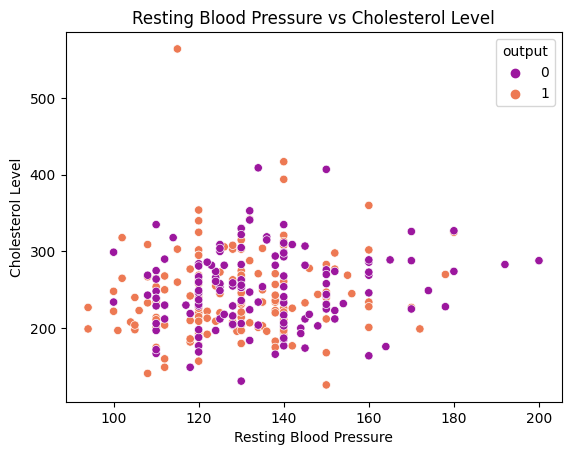

In [245]:
sns.scatterplot(x='trtbps', y='chol', hue='output', data=df, palette='plasma' )
plt.title('Resting Blood Pressure vs Cholesterol Level')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Level')
plt.show()

## Multivariate Analysis

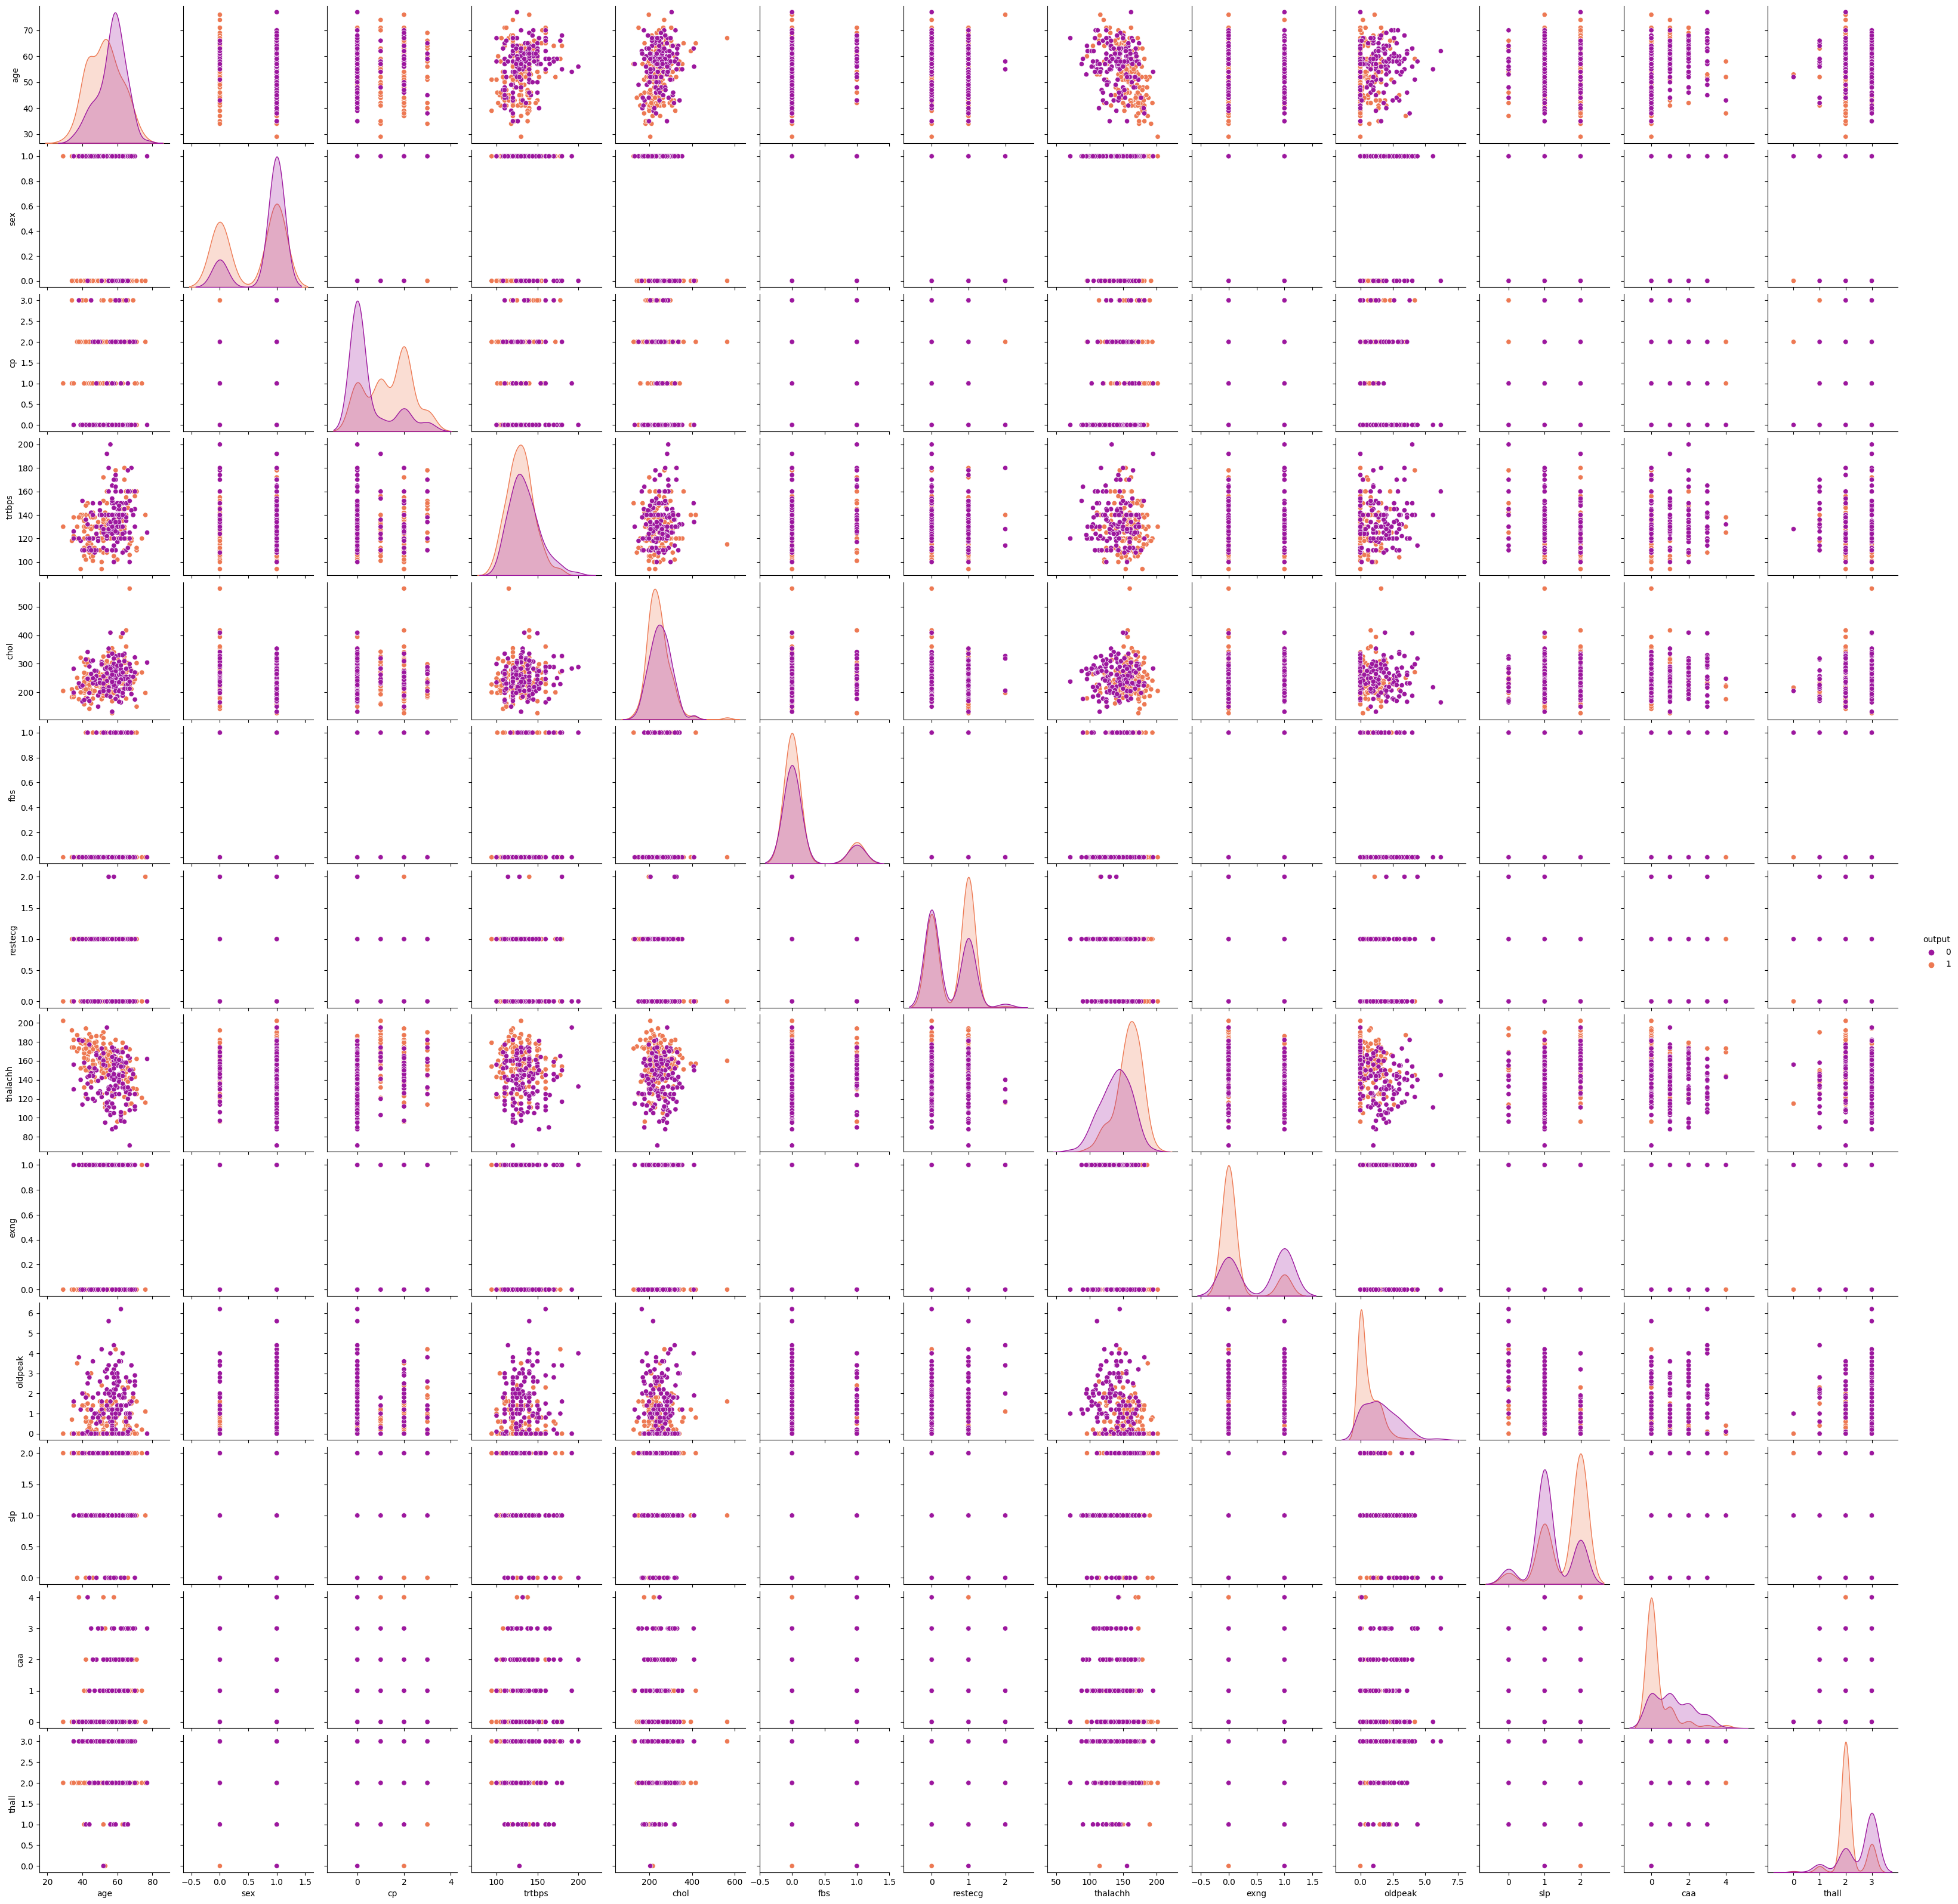

In [246]:
#sns.pairplot(df, hue='output',palette = ["#8000ff","#da8829"])
sns.pairplot(df, hue='output', palette='plasma')
plt.show()

<Figure size 2000x2000 with 0 Axes>

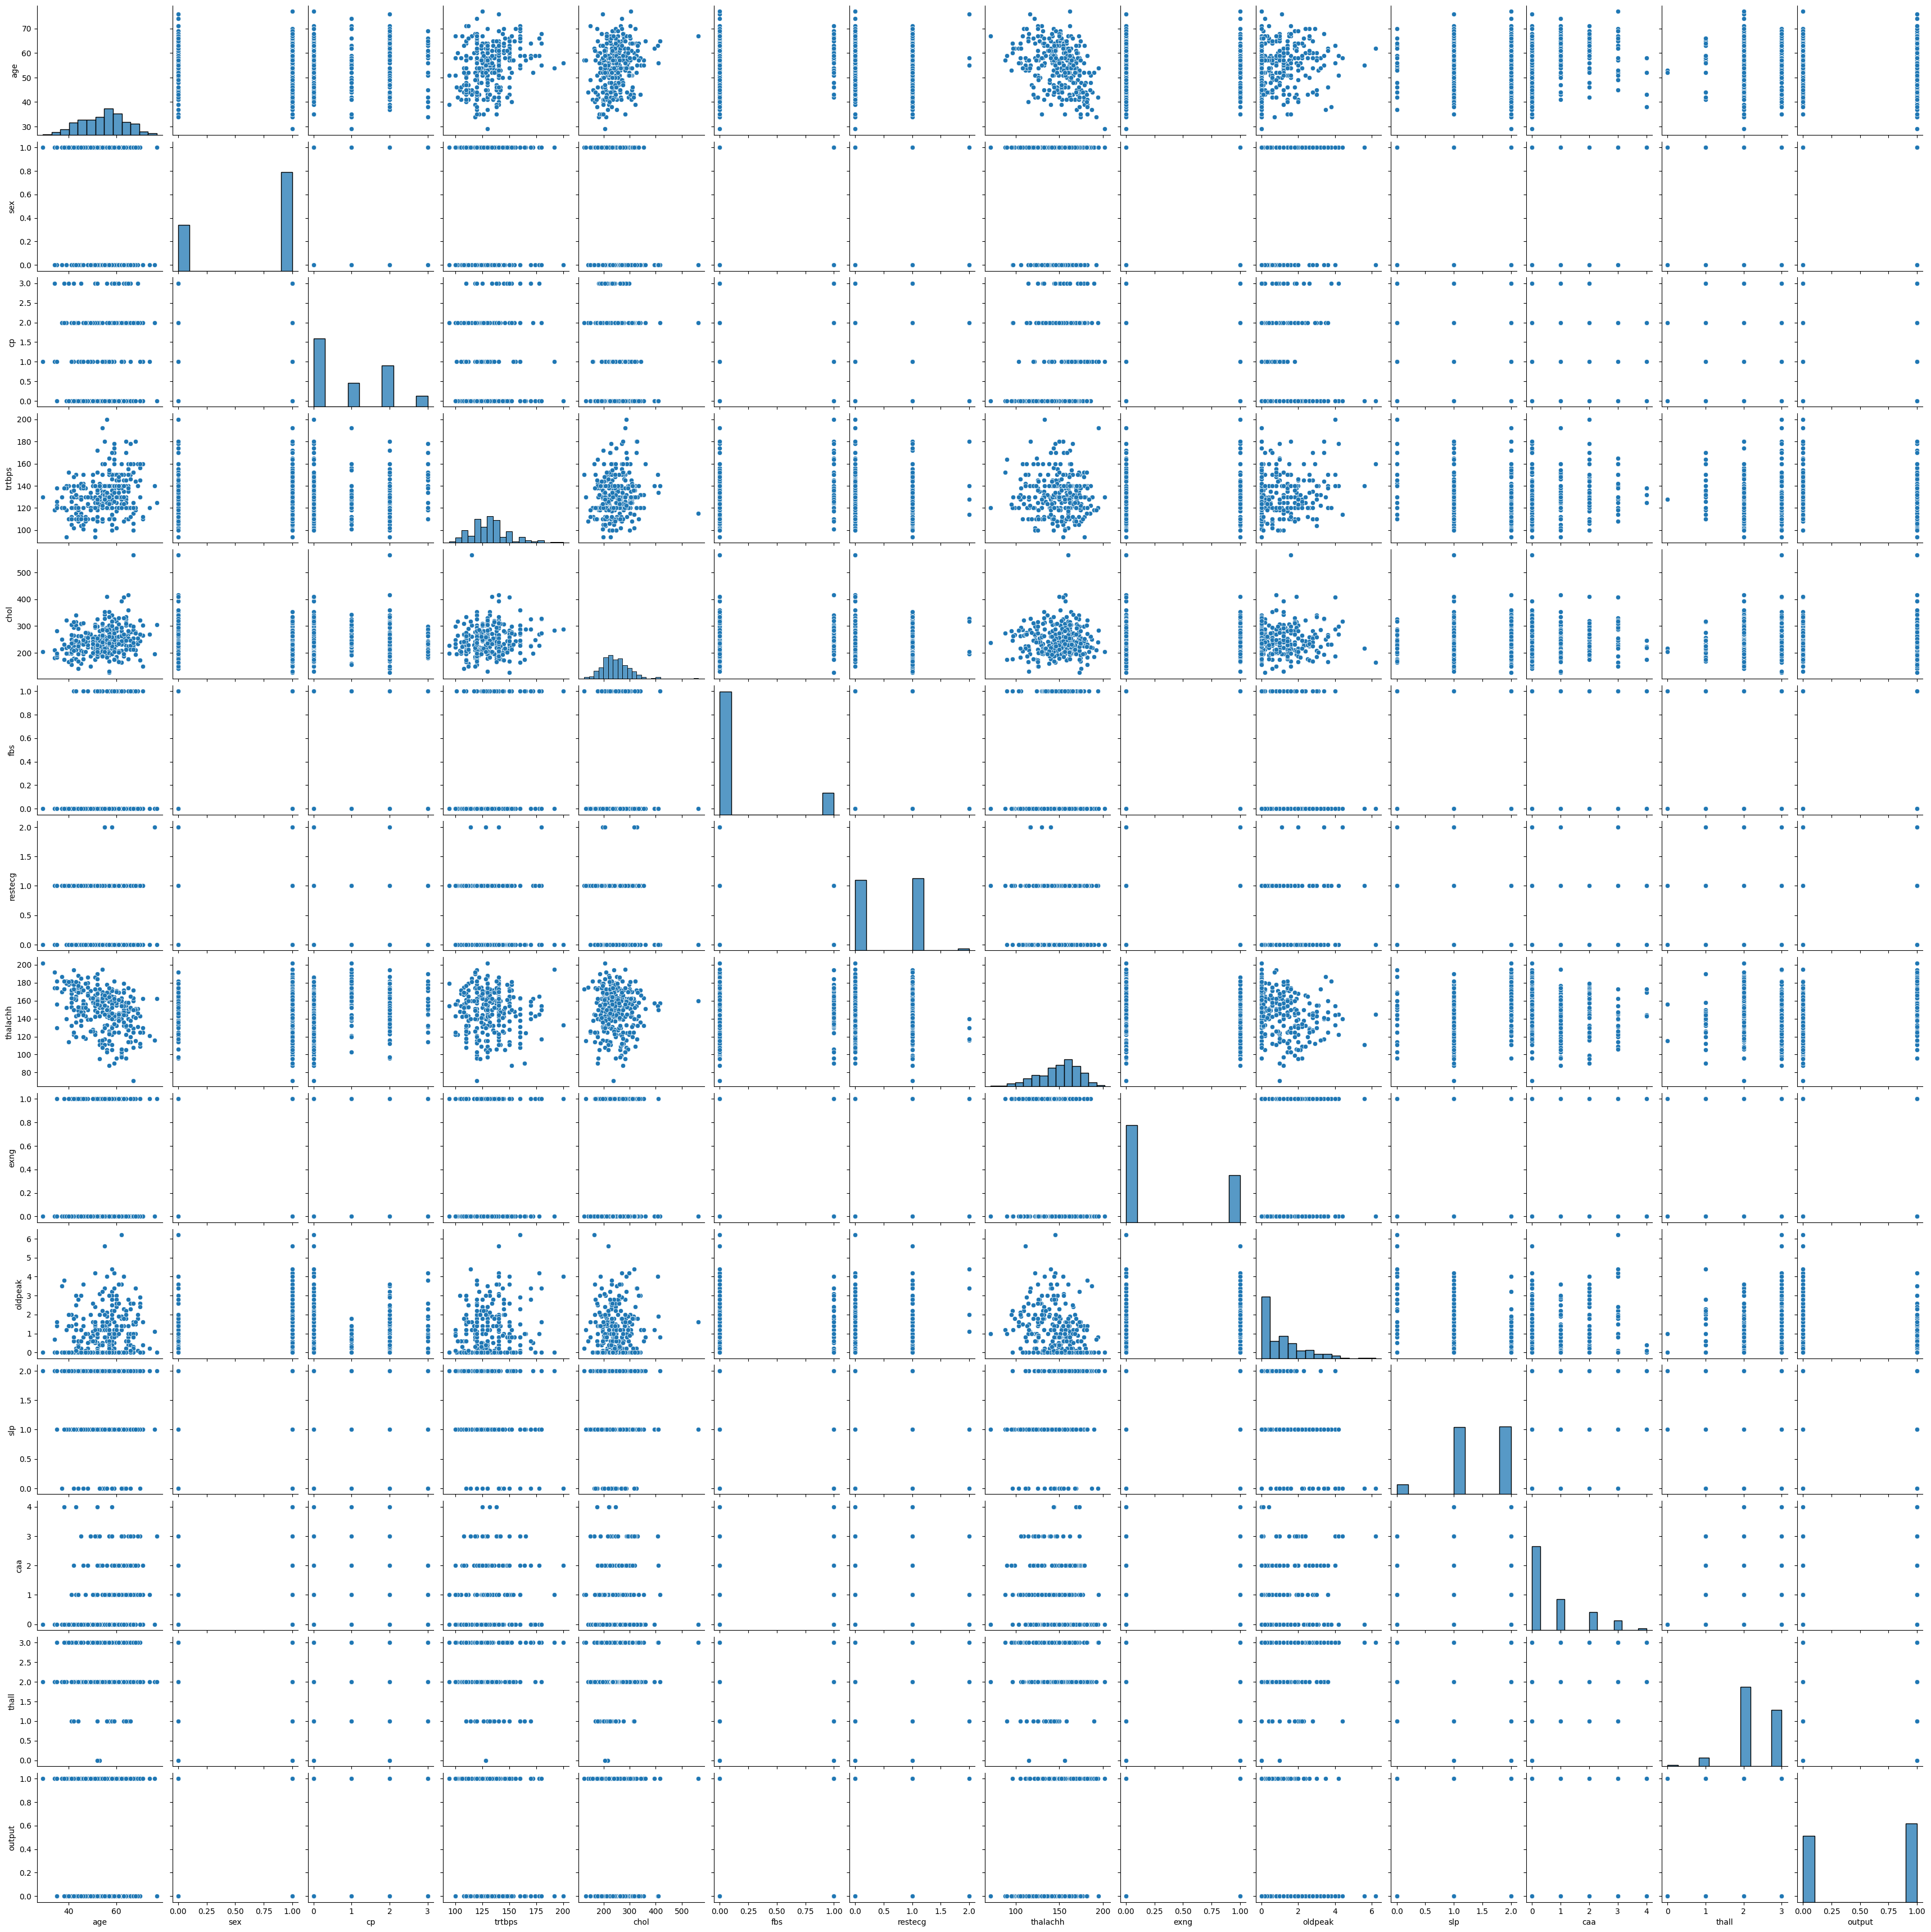

In [247]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

In [248]:
df.corr()

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trtbps    0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalachh -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exng      0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slp      -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
caa       0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thall     0.065317  0.211452 -0.160370  0.062870  0.096810 -0.032752   
output   -0.221476 -0.283609  0.432080 -0.146269 -0.081437 -0.026826   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.111590 -0.395235  0.093216  0.206040 -0.164124  0.302261   
sex      -0.060351 -0.046439  0.143460  0.098322 -0.032990  0.113060   
cp        0.041561  0.293367 -0.392937 -0.146692  0.116854 -0.195356   
trtbps   -0.115367 -0.048023  0.068526  0.194600 -0.122873  0.099248   
chol     -0.147602 -0.005308  0.064099  0.050086  0.000417  0.086878   
fbs      -0.083081 -0.007169  0.024729  0.004514 -0.058654  0.144935   
restecg   1.000000  0.041210 -0.068807 -0.056251  0.090402 -0.083112   
thalachh  0.041210  1.000000 -0.377411 -0.342201  0.384754 -0.228311   
exng     -0.068807 -0.377411  1.000000  0.286766 -0.256106  0.125377   
oldpeak  -0.056251 -0.342201  0.286766  1.000000 -0.576314  0.236560   
slp       0.090402  0.384754 -0.256106 -0.576314  1.000000 -0.092236   
caa      -0.083112 -0.228311  0.125377  0.236560 -0.092236  1.000000   
thall    -0.010473 -0.094910  0.205826  0.209090 -0.103314  0.160085   
output    0.134874  0.419955 -0.435601 -0.429146  0.343940 -0.408992   

             thall    output  
age       0.065317 -0.221476  
sex       0.211452 -0.283609  
cp       -0.160370  0.432080  
trtbps    0.062870 -0.146269  
chol      0.096810 -0.081437  
fbs      -0.032752 -0.026826  
restecg  -0.010473  0.134874  
thalachh -0.094910  0.419955  
exng      0.205826 -0.435601  
oldpeak   0.209090 -0.429146  
slp      -0.103314  0.343940  
caa       0.160085 -0.408992  
thall     1.000000 -0.343101  
output   -0.343101  1.000000

<Axes: >

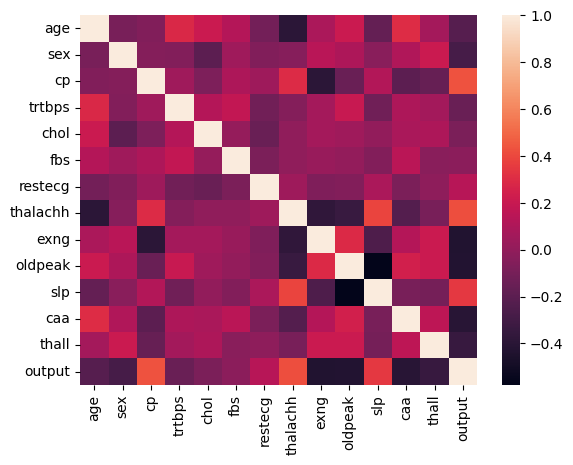

In [249]:
sns.heatmap(df.corr())

## Correlation Matrix

**Observations**
Output variable is correlated towards chest pain(cp), maximum heart rate achieved (thalachh) and spl.



<Axes: >

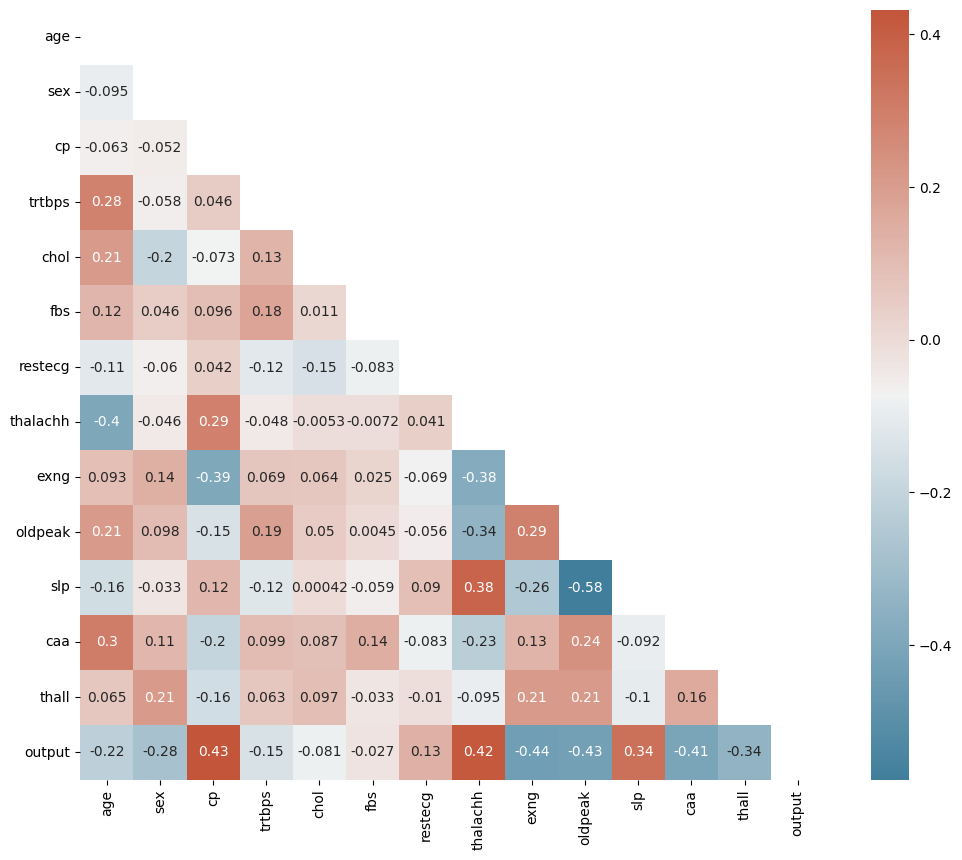

In [250]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Check Skewness

In [251]:
df['oldpeak'] = np.log1p(df['oldpeak'])
df['chol'] = np.log1p(df['chol'])

## Target Variable

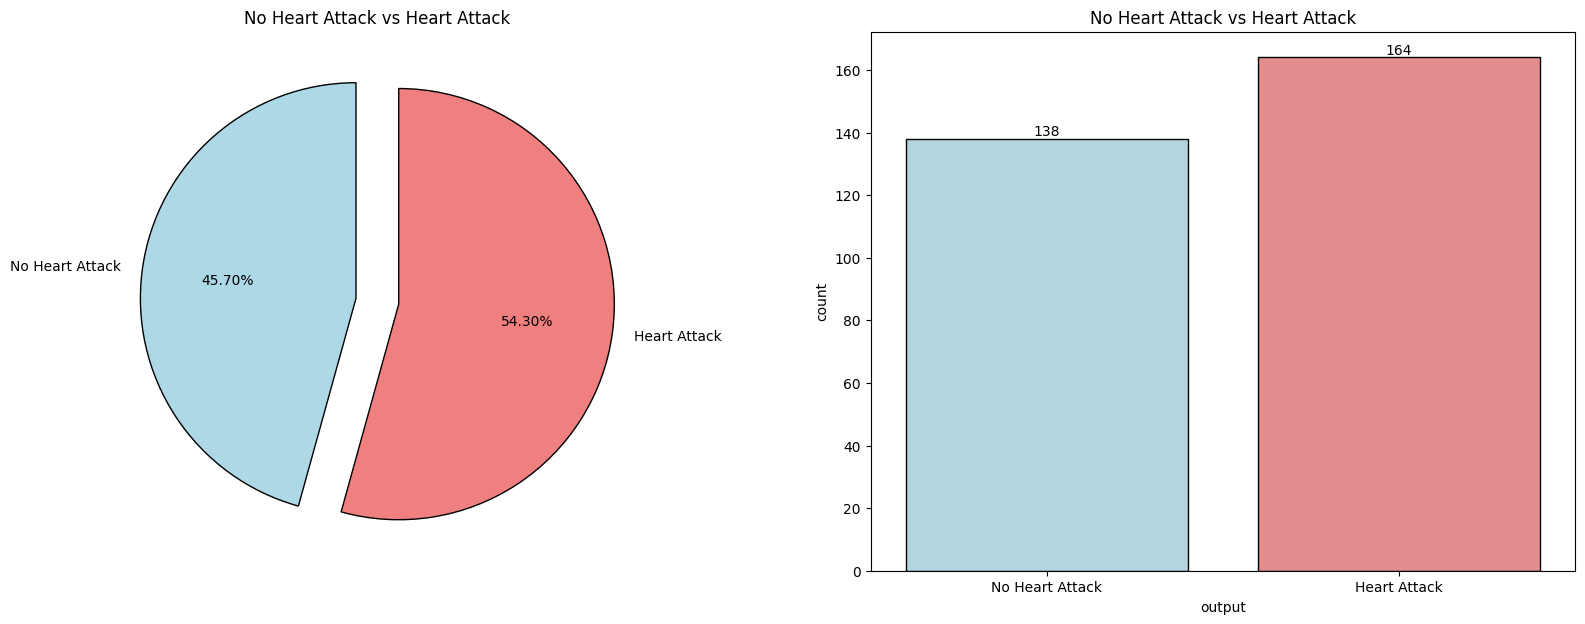

In [252]:
heart_attack = df['output'].value_counts()[1]
not_heart_attack = df['output'].value_counts()[0]
n = len(df)

heart_attack_percentage = (heart_attack / n) * 100
not_heart_attack_percentage = (not_heart_attack / n) * 100

pie_values = [not_heart_attack_percentage, heart_attack_percentage]

colors = ['lightblue', 'lightcoral']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# First subplot - Pie chart
plt.subplot(1, 2, 1)
plt.pie(pie_values, labels=['No Heart Attack', 'Heart Attack'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors=colors,  # Use the defined colors
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
       )
plt.title('No Heart Attack vs Heart Attack')


# Second subplot - Countplot
plt.subplot(1, 2, 2)
ax = sns.countplot(
                df,
                x='output',
                palette=colors,  # Use the defined colors
                edgecolor='black'
    )
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticks([0, 1])  # Set ticks manually to match the categories
ax.set_xticklabels(['No Heart Attack', 'Heart Attack'])

plt.title('No Heart Attack vs Heart Attack')
plt.show()

In [253]:
# Machine Learning Models

# Machine Learning Models
- Naive Bayes
- Logistic Regression
- Support Vector Machine
- KNN
- Decision Tree
- Perceptron
- Deep Neural Network

In [254]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
X.shape

(302, 12)

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [257]:
# Feature Scaling with StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [258]:
print(f"Shape of training data {X_train.shape} and {y_train.shape}")
print(f"Shape of testing data {X_test.shape} and {y_test.shape}")

Shape of training data (226, 12) and (226,)
Shape of testing data (76, 12) and (76,)


## Naive Bayes
Gausian Naive Bayes

In [259]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

In [260]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
predict_NB = model_NB.predict(X_test)

In [261]:
print(classification_report(y_test, predict_NB))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.86      0.88      0.87        43

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [262]:
rep = pd.DataFrame(classification_report(y_test, predict_NB, output_dict=True))
rep.T

precision    recall  f1-score    support
0              0.843750  0.818182  0.830769  33.000000
1              0.863636  0.883721  0.873563  43.000000
accuracy       0.855263  0.855263  0.855263   0.855263
macro avg      0.853693  0.850951  0.852166  76.000000
weighted avg   0.855001  0.855263  0.854982  76.000000

In [263]:
accuracy_NB = round(accuracy_score(y_test, predict_NB) * 100, 2)
print(f"Accuracy of Gaussian Naive Bayes model is : {accuracy_NB} %")

Accuracy of Gaussian Naive Bayes model is : 85.53 %


In [264]:
cm_1 = confusion_matrix(y_test, predict_NB)
cm_1

array([[27,  6],
       [ 5, 38]])

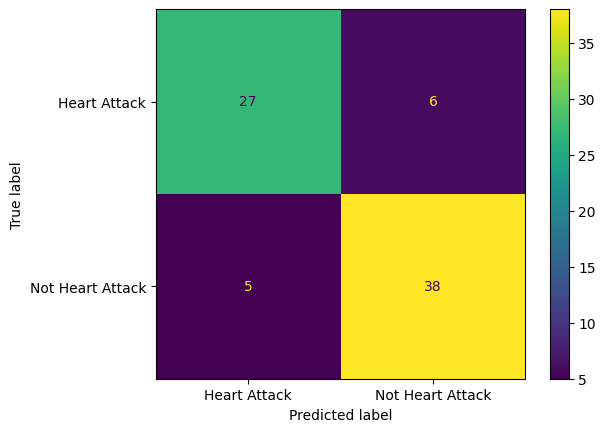

In [265]:
cm_display = ConfusionMatrixDisplay(cm_1, display_labels = ["Heart Attack", "Not Heart Attack"])
cm_display.plot()
plt.show()

## Logistic Regression

In [266]:
from sklearn.linear_model import LogisticRegression

In [267]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
predict_LR = model_LR.predict(X_test)

In [268]:
print(classification_report(y_test, predict_LR))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [269]:
accuracy_LR = round(accuracy_score(y_test, predict_LR) * 100, 2)
print(f"Accuracy of Logistic Regression model is : {accuracy_LR} %")

Accuracy of Logistic Regression model is : 85.53 %


In [270]:
cm_2 = confusion_matrix(y_test, predict_LR)
cm_2

array([[26,  7],
       [ 4, 39]])

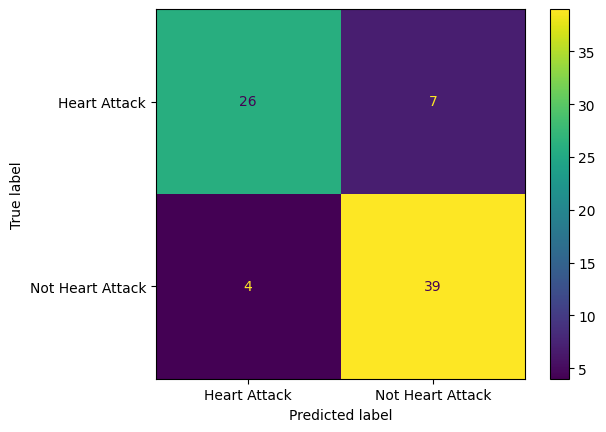

In [271]:
cm_display = ConfusionMatrixDisplay(cm_2, display_labels = ["Heart Attack", "Not Heart Attack"])
cm_display.plot()
plt.show()

## Support Vector Machines

In [272]:
from sklearn.svm import LinearSVC, SVC

In [273]:
#model_SVM = LinearSVC()
model_SVM = SVC(kernel='rbf', C=2)
model_SVM.fit(X_train, y_train)
predict_SVM = model_SVM.predict(X_test)

In [274]:
print(classification_report(y_test, predict_SVM))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.87      0.91      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76



In [275]:
accuracy_SVM = round(accuracy_score(y_test, predict_SVM) * 100, 2)
print(f"Accuracy of Support Vector Machine model is : {accuracy_SVM} %")

Accuracy of Support Vector Machine model is : 86.84 %


In [276]:
cm_3 = confusion_matrix(y_test, predict_SVM)
cm_3

array([[27,  6],
       [ 4, 39]])

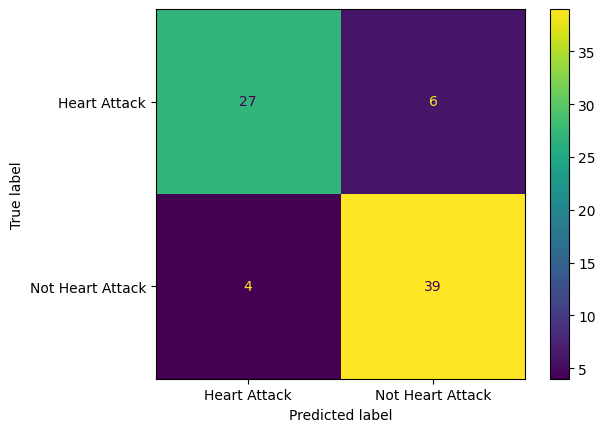

In [277]:
cm_display = ConfusionMatrixDisplay(cm_3, display_labels = ["Heart Attack", "Not Heart Attack"])
cm_display.plot()
plt.show()

## KNN

In [278]:
from sklearn.neighbors import KNeighborsClassifier

In [279]:
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train, y_train)
predict_KNN = model_KNN.predict(X_test)

In [280]:
print(classification_report(y_test, predict_KNN))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.84      0.95      0.89        43

    accuracy                           0.87        76
   macro avg       0.88      0.86      0.86        76
weighted avg       0.88      0.87      0.87        76



In [281]:
accuracy_KNN = round(accuracy_score(y_test, predict_KNN) * 100, 2)
print(f"Accuracy of K Nearest Neighbour model is : {accuracy_KNN} %")

Accuracy of K Nearest Neighbour model is : 86.84 %


In [282]:
cm_4 = confusion_matrix(y_test, predict_KNN)
cm_4

array([[25,  8],
       [ 2, 41]])

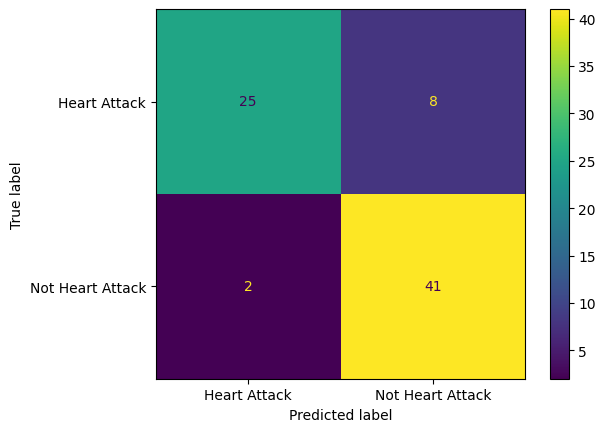

In [283]:
cm_display = ConfusionMatrixDisplay(cm_4, display_labels = ["Heart Attack", "Not Heart Attack"])
cm_display.plot()
plt.show()

### Elbow method for finding value of k

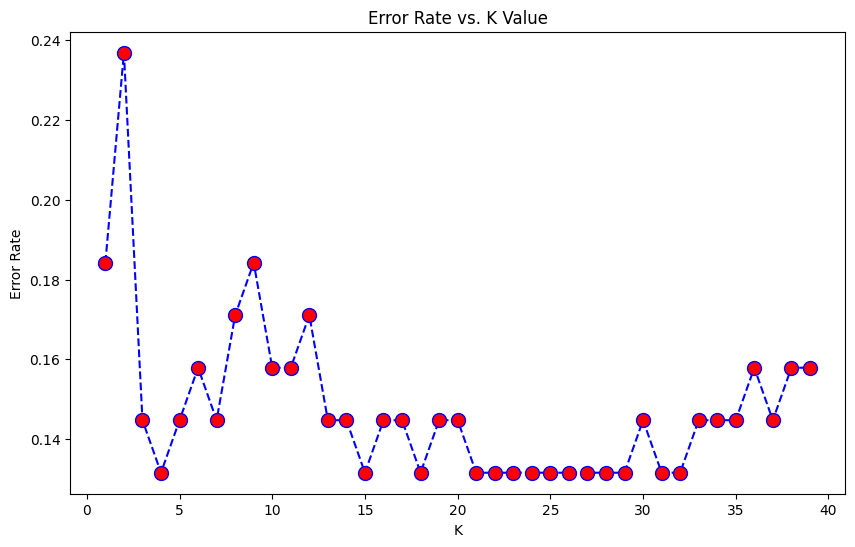

In [284]:
error_rate = []

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40),
         error_rate,
         color ='blue',
         linestyle ='dashed',
         marker ='o',
         markerfacecolor ='red',
         markersize = 10
)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

## Decision Tree

In [285]:
from sklearn.tree import DecisionTreeClassifier

In [286]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_test)

In [287]:
print(classification_report(y_test, predict_DT))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.81      0.81      0.81        43

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [288]:
accuracy_DT = round(accuracy_score(y_test, predict_DT) * 100, 2)
print(f"Accuracy of K Nearest Neighbour model is : {accuracy_DT} %")

Accuracy of K Nearest Neighbour model is : 78.95 %


In [289]:
cm_5 = confusion_matrix(y_test, predict_KNN)
cm_5

array([[25,  8],
       [ 2, 41]])

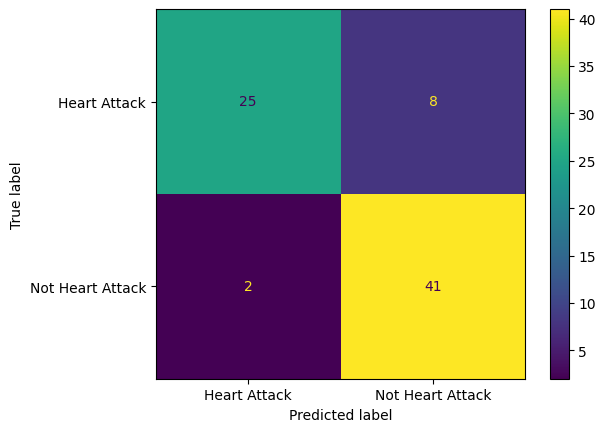

In [290]:
cm_display = ConfusionMatrixDisplay(cm_5, display_labels = ["Heart Attack", "Not Heart Attack"])
cm_display.plot()
plt.show()

## Perceptron

In [291]:
from sklearn.neural_network import MLPClassifier

In [292]:
model_NN = MLPClassifier(
    random_state=48,
    hidden_layer_sizes=(150,100,50),
    max_iter=150,
    activation = 'relu',
    solver='adam'
)
model_NN.fit(X_train, y_train)
predict_NN = model_DT.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [293]:
print(classification_report(y_test, predict_NN))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.81      0.81      0.81        43

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [294]:
accuracy_NN = round(accuracy_score(y_test, predict_NN) * 100, 2)
print(f"Accuracy of Neural Network model is : {accuracy_NN} %")

Accuracy of Neural Network model is : 78.95 %


In [295]:
cm_6 = confusion_matrix(y_test, predict_KNN)
cm_6

array([[25,  8],
       [ 2, 41]])

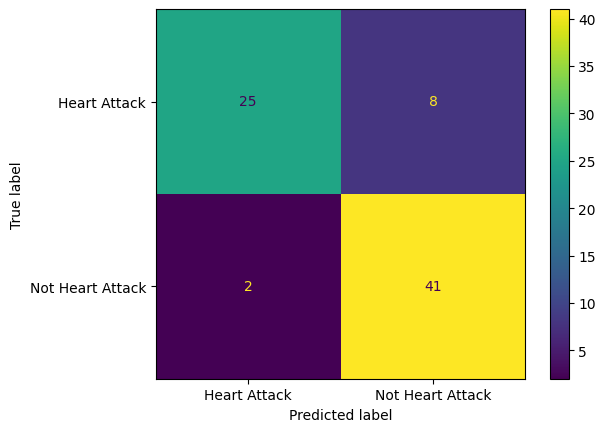

In [296]:
cm_display = ConfusionMatrixDisplay(cm_6, display_labels = ["Heart Attack", "Not Heart Attack"])
cm_display.plot()
plt.show()

## Deep Neural *Network*

In [297]:
import tensorflow as tf

In [298]:
model_DNN = tf.keras.Sequential([
    tf.keras.Input(12),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_DNN.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

history = model_DNN.fit(X_train, y_train, epochs = 50, validation_split = 0.20)

Epoch 1/50
6/6 [==============================] - 1s 58ms/step - loss: 0.6847 - auc: 0.5661 - val_loss: 0.5866 - val_auc: 0.8152
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6236 - auc: 0.7140 - val_loss: 0.5382 - val_auc: 0.9086
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.5696 - auc: 0.8007 - val_loss: 0.4986 - val_auc: 0.9362
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5367 - auc: 0.8464 - val_loss: 0.4657 - val_auc: 0.9486
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5028 - auc: 0.8778 - val_loss: 0.4394 - val_auc: 0.9552
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.4841 - auc: 0.8769 - val_loss: 0.4185 - val_auc: 0.9581
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.4684 - auc: 0.8866 - val_loss: 0.4003 - val_auc: 0.9600
Epoch 8/50
6/6 [==============================] - 0s 11ms/step - loss: 0.4485 - auc: 0.8982 - val

In [299]:
predict_DNN = model_DNN.predict(X_test)
predict_DNN = tf.cast(tf.round(predict_DNN), dtype=tf.int32).numpy().reshape(76)

3/3 [==============================] - 0s 3ms/step


In [300]:
print(classification_report(y_test, predict_DNN))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.84      0.88      0.86        43

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [301]:
rep = pd.DataFrame(classification_report(y_test, predict_DNN, output_dict=True))
rep.T

precision    recall  f1-score    support
0              0.838710  0.787879  0.812500  33.000000
1              0.844444  0.883721  0.863636  43.000000
accuracy       0.842105  0.842105  0.842105   0.842105
macro avg      0.841577  0.835800  0.838068  76.000000
weighted avg   0.841954  0.842105  0.841432  76.000000

In [302]:
accuracy_DNN = round(accuracy_score(y_test, predict_DNN) * 100, 2)
print(f"Accuracy of Neural Network model is : {accuracy_DNN} %")

Accuracy of Neural Network model is : 84.21 %


In [303]:
cm_7 = confusion_matrix(y_test, predict_DNN)
cm_7

array([[26,  7],
       [ 5, 38]])

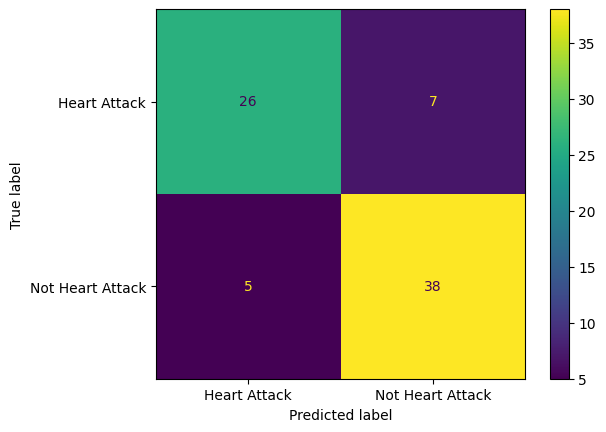

In [304]:
cm_display = ConfusionMatrixDisplay(cm_7, display_labels = ["Heart Attack", "Not Heart Attack"])
cm_display.plot()
plt.show()

# Comparing Machine Learning Models

Model  Accuracy
2  Support Vector Machines     86.84
3                      KNN     86.84
0              Naive Bayes     85.53
1      Logistic Regression     85.53
6      Deep Neural Network     84.21
4            Decision Tree     78.95
5               Perceptron     78.95

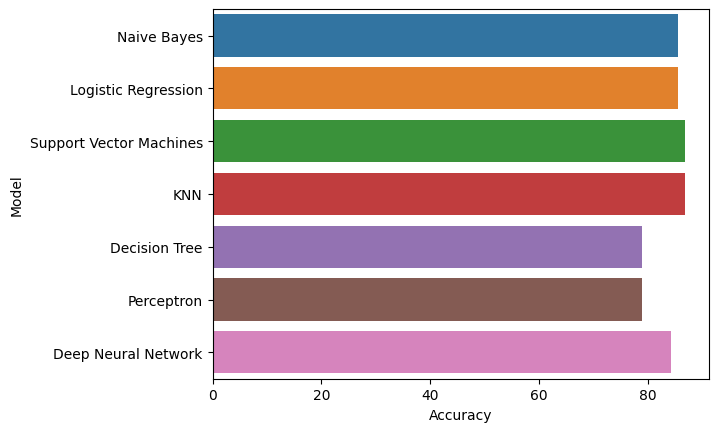

In [305]:
ML_models = pd.DataFrame({
    'Model': [
        'Naive Bayes',
        'Logistic Regression',
        'Support Vector Machines',
        'KNN',
        'Decision Tree',
        'Perceptron',
        'Deep Neural Network',
    ],
    'Accuracy': [
        accuracy_NB,
        accuracy_LR,
        accuracy_SVM,
        accuracy_KNN,
        accuracy_DT,
        accuracy_NN,
        accuracy_DNN,
        ]
})

sns.barplot(x='Accuracy', y='Model', data=ML_models)

ML_models.sort_values(by='Accuracy', ascending=False)